# Question 1) Read the .csv file using Pandas. Take a look at the top few records.

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk import corpus 
import seaborn as sns
nltk.download('tagsets')

df = pd.read_csv(r'C:\Users\Aditya Gaitonde\Downloads\K8 Reviews v0.2.csv')
df.head()

[nltk_data] Downloading package tagsets to C:\Users\Aditya
[nltk_data]     Gaitonde\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


,sentiment,review
0,1,Good but need updates and improvements
1,0,"Worst mobile i have bought ever, Battery is dr..."
2,1,when I will get my 10% cash back.... its alrea...
3,1,Good
4,0,The worst phone everThey have changed the last...


# Question 2) Normalize casings for the review text and extract the text into a list for easier manipulation.

In [2]:
reviews = list(df['review'].values)
reviews = [review.lower() for review in reviews]
print (reviews[0])

good but need updates and improvements


# Question 3) Tokenize the reviews using NLTKs word_tokenize function.

In [3]:
review_tokens = [nltk.word_tokenize(review) for review in reviews]
review_tokens[0]

['good', 'but', 'need', 'updates', 'and', 'improvements']

# Question 4) Perform parts-of-speech tagging on each sentence using the NLTK POS tagger

In [4]:
pos_tagged = [nltk.pos_tag(review) for review in review_tokens]
pos_tagged[0]

[('good', 'JJ'),
 ('but', 'CC'),
 ('need', 'VBP'),
 ('updates', 'NNS'),
 ('and', 'CC'),
 ('improvements', 'NNS')]

# Question 5) For the topic model, we should  want to include only nouns.

# A) Find out all the POS tags that correspond to nouns.

# B) Limit the data to only terms with these tags.

In [5]:
reviews_noun = []
for review in pos_tagged:
    reviews_noun.append([postag for postag in review if postag[1].startswith('NN')])

# Question 6) Lemmatize. 

In [6]:
lem = nltk.WordNetLemmatizer()
lem_reviews =[]
for  review in reviews_noun:
    lem_reviews.append([lem.lemmatize(postag[0]) for postag in review])
print (lem_reviews[0])

['update', 'improvement']


# Question 7) Remove stopwords and punctuation

In [7]:
from nltk.corpus import stopwords
from string import punctuation
clean_reviews = []
for review in lem_reviews:
    clean_reviews.append([word for word in review if word not in (stopwords.words('English') + list(punctuation))])
print (clean_reviews[0])

['update', 'improvement']


# Question 8) Create a topic model using LDA on the cleaned-up data with 12 topics.

# B) What is the coherence of the model with the c_v metric?

In [8]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim_models  
import matplotlib.pyplot as plt
%matplotlib inline

id2word = corpora.Dictionary(clean_reviews)
print ("Corpora dictionary")
print (id2word)

texts = clean_reviews
clean_reviews[1]

C:\Users\Aditya Gaitonde\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


Corpora dictionary
Dictionary(9263 unique tokens: ['improvement', 'update', 'amazon', 'backup', 'battery']...)


['mobile',
 'battery',
 'hell',
 'backup',
 'hour',
 'us',
 'idle',
 'discharged.this',
 'lie',
 'amazon',
 'lenove',
 'battery',
 'charger',
 'hour']

In [9]:
corpus = [id2word.doc2bow(text) for text in texts]
print ("Document frequency")
print (corpus[200])

Document frequency
[(14, 2), (37, 1), (144, 1), (315, 1), (416, 1), (417, 1)]


C:\Users\Aditya Gaitonde\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=12, 
                                       random_state=42,
                                       passes=10,
                                       per_word_topics=True)
coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_reviews, dictionary=id2word, coherence='c_v')
ch = coherence_model_lda.get_coherence()
print("Coherence Score = ",ch)

C:\Users\Aditya Gaitonde\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coherence Score =  0.5210843618371478


# A) Print out the top terms for each topic.

In [11]:
from pprint import pprint
pprint (lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.055*"speaker" + 0.032*"ram" + 0.027*"music" + 0.025*"time" + 0.023*"app" '
  '+ 0.022*"sensor" + 0.022*"apps" + 0.019*"image" + 0.017*"button" + '
  '0.016*"gb"'),
 (1,
  '0.118*"phone" + 0.049*"service" + 0.049*"day" + 0.048*"amazon" + '
  '0.047*"time" + 0.044*"charger" + 0.025*"month" + 0.024*"delivery" + '
  '0.021*"handset" + 0.020*"turbo"'),
 (2,
  '0.184*"camera" + 0.099*"phone" + 0.091*"quality" + 0.020*"performance" + '
  '0.017*"processor" + 0.015*"mode" + 0.014*"feature" + 0.013*"note" + '
  '0.012*"speed" + 0.012*"sound"'),
 (3,
  '0.122*"issue" + 0.110*"phone" + 0.069*"network" + 0.033*"money" + '
  '0.032*"sim" + 0.028*"value" + 0.022*"h" + 0.020*"support" + 0.019*"time" + '
  '0.018*"jio"'),
 (4,
  '0.329*"battery" + 0.062*"backup" + 0.049*"performance" + 0.040*"camera" + '
  '0.036*"life" + 0.034*"issue" + 0.034*"hour" + 0.031*"day" + 0.023*"drain" + '
  '0.022*"usage"'),
 (5,
  '0.231*"problem" + 0.065*"heating" + 0.061*"call" + 0.052*"option" + '
  '0.034*"s

C:\Users\Aditya Gaitonde\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Question 9) Analyze the topics through the business lens.
Determine which of the topics can be combined.

Topic 9 ,10,11,12 can be combined as they all represent 'pricing'\ Topics 1 and 2 can be combined as they all represent vaguely 'phone issues' \ Topics 3 and 4 can be combined as they represent battery 'performance'

# Question 10) Create topic model using LDA with what you think is the optimal number of topics

In [12]:
def compute_coherence_values(dictionary, corpus, texts, limit=15, start=5, step=1):
    
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                               id2word=id2word,
                                               num_topics=num_topics, 
                                               random_state=42,
                                               passes=10,
                                               per_word_topics=True)
        model_list.append(lda_model)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_reviews, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherence_model_lda.get_coherence())

    return model_list, coherence_values

C:\Users\Aditya Gaitonde\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=clean_reviews, 
                                                        start=5, 
                                                        limit=15, 
                                                        step=1)

C:\Users\Aditya Gaitonde\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\Aditya Gaitonde\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


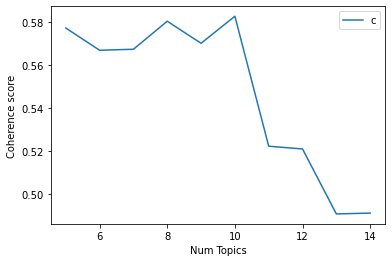

In [14]:
limit=15; start=5; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [15]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 5  has Coherence Value of 0.5773
Num Topics = 6  has Coherence Value of 0.5669
Num Topics = 7  has Coherence Value of 0.5674
Num Topics = 8  has Coherence Value of 0.5804
Num Topics = 9  has Coherence Value of 0.5702
Num Topics = 10  has Coherence Value of 0.5827
Num Topics = 11  has Coherence Value of 0.5224
Num Topics = 12  has Coherence Value of 0.5211
Num Topics = 13  has Coherence Value of 0.4909
Num Topics = 14  has Coherence Value of 0.4913


C:\Users\Aditya Gaitonde\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# A) What is the coherence of the model?

Therefore the optimal number of topics is 10 and the Coherence score for it is 0.5827

# Question 11) The business should  be able to interpret the topics.

# A) Name each of the identified topics.

In [16]:
topics = lda_model.show_topics(formatted=False)
topic_id = [t[0] for t in topics]
print (topic_id)
names = ['Mobile issues', 'Battery Performance', 'Features and Details' , 'Phone Performance', 'Amazon Services' , 'Value For Money']
named_df = pd.DataFrame({'Topic ID ' : [topic_id], 'Business Name': [names]})

[10, 6, 0, 2, 8, 3, 7, 9, 5, 11]


C:\Users\Aditya Gaitonde\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# B) Create a table with the topic name and the top 10 terms in each to present to the  business.

In [17]:
topics = lda_model.show_topics(formatted=False)
topic_id = [t[0] for t in topics]
print (topic_id)
top_terms = []
for topic in topics:
    top_terms.append([term[0] for term in topic[1]])
    
topic_df = pd.DataFrame({'Topic ID': topic_id, 'Top Terms':top_terms})

topic_df.style.hide_index()

[6, 1, 8, 5, 4, 10, 9, 0, 11, 7]


C:\Users\Aditya Gaitonde\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic ID,Top Terms
6,"['heat', 'money', 'waste', 'hr', 'mobile', 'earphone', 'function', 'pls', 'item', 'message']"
1,"['phone', 'service', 'day', 'amazon', 'time', 'charger', 'month', 'delivery', 'handset', 'turbo']"
8,"['product', 'note', 'k8', 'lenovo', '.....', 'experience', '......', 'condition', 'till', 'date']"
5,"['problem', 'heating', 'call', 'option', 'screen', 'phone', 'cast', 'contact', 'model', 'note']"
4,"['battery', 'backup', 'performance', 'camera', 'life', 'issue', 'hour', 'day', 'drain', 'usage']"
10,"['phone', '..', 'mobile', 'price', 'range', 'feature', 'superb', 'performance', 'buy', 'super']"
9,"['....', 'star', 'system', 'dolby', 'sound', 'atmos', 'ok', 'r', 'k4', 'please']"
0,"['speaker', 'ram', 'music', 'time', 'app', 'sensor', 'apps', 'image', 'button', 'gb']"
11,"['device', 'software', 'update', 'feature', 'budget', 'bit', 'smartphone', 'lenovo', 'mode', 'cost']"
7,"['hai', 'glass', 'headphone', 'display', 'core', 'gorilla', 'ho', 'excellent', 'plz', 'deca']"
